# Extrayendo Información desde Kaggle

In [ ]:
# ========================================
# BLOQUE 1: Configuración y descarga desde Kaggle
# ========================================

import os
from google.colab import files

print("PASO 1: Subir archivo kaggle.json")
print("=" * 70)
print("Instrucciones:")
print("1. Ve a https://www.kaggle.com/settings/account")
print("2.  En la seccion API, haz clic en 'Create New API Token'")
print("3. Se descargara kaggle.json")
print("4. Subelo cuando aparezca el boton de carga")
print("=" * 70)

# Subir kaggle.json
uploaded = files.upload()

# Verificar que se subió el archivo correcto
if 'kaggle.json' not in uploaded:
    print("\nERROR: No se subio kaggle.json")
    print("Por favor ejecuta este bloque nuevamente y sube el archivo correcto")
else:
    print("\nPASO 2: Configurando credenciales...")

    # Configurar directorio y permisos
    os.environ['KAGGLE_CONFIG_DIR'] = '.'
    ! chmod 600 ./kaggle.json

    print("Credenciales configuradas correctamente")

    print("\nPASO 3: Descargando dataset de la competencia...")
    print("Esto puede tardar unos minutos...")

    # Descargar dataset
    ! kaggle competitions download -c udea-ai-4-eng-20252-pruebas-saber-pro-colombia

    # Verificar descarga
    if os.path.exists('udea-ai-4-eng-20252-pruebas-saber-pro-colombia.zip'):
        print("\nArchivo descargado correctamente")
    else:
        print("\nERROR: No se pudo descargar el archivo")
        print("Verifica que:")
        print("1.  Aceptaste las reglas de la competencia")
        print("2. El archivo kaggle.json es correcto")

PASO 1: Subir archivo kaggle.json
Instrucciones:
1. Ve a https://www.kaggle.com/settings/account
2.  En la seccion API, haz clic en 'Create New API Token'
3. Se descargara kaggle.json
4. Subelo cuando aparezca el boton de carga


Saving kaggle.json to kaggle.json

PASO 2: Configurando credenciales...
Credenciales configuradas correctamente

PASO 3: Descargando dataset de la competencia...
Esto puede tardar unos minutos...
  0% 0.00/29.9M [00:00<?, ?B/s]
100% 29.9M/29.9M [00:00<00:00, 1.72GB/s]

Archivo descargado correctamente


In [ ]:
# ========================================
# BLOQUE 1 y 2 COMBINADOS: Descargar y descomprimir
# ========================================

import os
import zipfile
import glob

print("PASO 1: Descargando dataset nuevamente...")
print("=" * 70)

# Descargar dataset
! kaggle competitions download -c udea-ai-4-eng-20252-pruebas-saber-pro-colombia

print("\nPASO 2: Buscando archivo ZIP...")

# Buscar archivo ZIP
archivos = os.listdir('.')
archivo_zip = None

for archivo in archivos:
    if archivo. endswith('.zip'):
        archivo_zip = archivo
        print(f"Archivo encontrado: {archivo_zip}")
        break

if archivo_zip:
    print("\nPASO 3: Descomprimiendo con Python...")

    try:
        # Descomprimir
        with zipfile.ZipFile(archivo_zip, 'r') as zip_ref:
            zip_ref.extractall('.')

        print("Descompresion exitosa")

        # Eliminar ZIP
        os.remove(archivo_zip)
        print("ZIP eliminado")

    except Exception as e:
        print(f"Error: {e}")
else:
    print("ERROR: No se encontro archivo ZIP")

# Verificar archivos CSV
print("\n" + "=" * 70)
print("ARCHIVOS CSV DISPONIBLES:")
print("=" * 70)

archivos_csv = glob.glob('*.csv')

if archivos_csv:
    total_size = 0
    for csv in sorted(archivos_csv):
        size_mb = os.path.getsize(csv) / 1024 / 1024
        total_size += size_mb

        with open(csv) as f:
            num_filas = sum(1 for _ in f) - 1

        print(f"\n{csv}")
        print(f"  Tamano: {size_mb:.2f} MB")
        print(f"  Filas: {num_filas:,}")

    print(f"\nTamano total: {total_size:.2f} MB")

    # Verificar archivos críticos
    tiene_train = any('train' in f. lower() for f in archivos_csv)
    tiene_test = any('test' in f.lower() for f in archivos_csv)

    print("\n" + "=" * 70)
    if tiene_train and tiene_test:
        print("ESTADO: COMPLETO ✓")
        print("Puedes continuar con el Bloque 3")
    else:
        print("ADVERTENCIA: Faltan archivos")
else:
    print("\nNo se encontraron archivos CSV")
    print("Ejecuta este bloque nuevamente")

PASO 1: Descargando dataset nuevamente...
udea-ai-4-eng-20252-pruebas-saber-pro-colombia.zip: Skipping, found more recently modified local copy (use --force to force download)

PASO 2: Buscando archivo ZIP...
Archivo encontrado: udea-ai-4-eng-20252-pruebas-saber-pro-colombia.zip

PASO 3: Descomprimiendo con Python...
Descompresion exitosa
ZIP eliminado

ARCHIVOS CSV DISPONIBLES:

submission_example.csv
  Tamano: 4.50 MB
  Filas: 296,786

test.csv
  Tamano: 56.44 MB
  Filas: 296,786

train.csv
  Tamano: 137.07 MB
  Filas: 692,500

Tamano total: 198.02 MB

ESTADO: COMPLETO ✓
Puedes continuar con el Bloque 3


# Importaciones e Instalaciones necesarias.

In [ ]:
# ========================================
# BLOQUE 3: Importaciones e Instalaciones necesarias
# ========================================

print("Instalando CatBoost...")
!pip install -q catboost

print("\nImportando librerias...")
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from catboost import CatBoostClassifier, Pool
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

print("\nLibrerias importadas correctamente")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")
print("\nSistema listo para entrenar el modelo")

Instalando CatBoost...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.9 MB/s eta 0:00:00

Importando librerias...

Librerias importadas correctamente
Pandas version: 2.2.2
NumPy version: 2.0.2

Sistema listo para entrenar el modelo


# Clase para la generación del modelo

La clase **StudentPerformanceClassifier** implementa un pipeline completo de Machine Learning para predecir el rendimiento académico de estudiantes. Sus principales componentes son:

### Características principales:
- **Preprocesamiento de datos**: Limpieza, imputación de valores faltantes y creación de features derivadas
- **Feature Engineering**:
  - Variables educativas (nivel educativo de padres)
  - Variables económicas (estrato, matrícula, bienes del hogar)
  - Variables contextuales (programa académico, departamento)
  - Target encoding para variables categóricas de alta cardinalidad
- **Modelo**: CatBoostClassifier optimizado para manejar variables categóricas nativamente
- **Evaluación**: Métricas de clasificación multiclase y matriz de confusión

### Ventajas de este enfoque:
- CatBoost maneja automáticamente variables categóricas sin necesidad de one-hot encoding
- El target encoding captura la relación entre programas/departamentos y el rendimiento
- Las features derivadas capturan interacciones importantes entre variables socioeconómicas

el bloque que sigue es para probar 3 modelos de los cuales se puede ver que el mejor es xgbboots

In [ ]:
# ========================================
# BLOQUE 4: Clase para la generación del modelo - COMPETENCIA 2025-2
# ========================================

class StudentPerformanceClassifier:
    """
    Clasificador de rendimiento académico utilizando CatBoost.
    Adaptado para competencia 2025-2
    """
    def __init__(self):
        self.model = None
        self.feature_importance = None
        self.target_encodings = {}
        self.df_train = None

    def rendimiento_to_numeric(self, rendimiento):
        """
        Convierte las categorías de rendimiento a valores numéricos
        """
        mapping = {
            'bajo': 0,
            'medio-bajo': 1,
            'medio-alto': 2,
            'alto': 3
        }
        return mapping[rendimiento]

    def create_location_program_features(self, df, target_df=None):
        """
        Generamos características basadas en la ubicación y programa académico
        """
        if target_df is not None:
            target_df = target_df.copy()
            target_df['RENDIMIENTO_NUM'] = target_df['RENDIMIENTO_GLOBAL'].map(self.rendimiento_to_numeric)

            prog_stats = target_df. groupby('E_PRGM_ACADEMICO')['RENDIMIENTO_NUM'].agg(['mean', 'std']).reset_index()
            self.target_encodings['programa'] = prog_stats. set_index('E_PRGM_ACADEMICO')

            dept_stats = target_df.groupby('E_PRGM_DEPARTAMENTO')['RENDIMIENTO_NUM'].agg(['mean', 'std']).reset_index()
            self.target_encodings['departamento'] = dept_stats.set_index('E_PRGM_DEPARTAMENTO')

            prog_counts = target_df.groupby('E_PRGM_ACADEMICO'). size()
            dept_counts = target_df.groupby('E_PRGM_DEPARTAMENTO').size()
            self.target_encodings['programa']['count'] = prog_counts
            self.target_encodings['departamento']['count'] = dept_counts

        df['PROG_RENDIMIENTO_MEDIO'] = df['E_PRGM_ACADEMICO'].map(self.target_encodings['programa']['mean'])
        df['PROG_RENDIMIENTO_STD'] = df['E_PRGM_ACADEMICO']. map(self.target_encodings['programa']['std'])
        df['PROG_COUNT'] = df['E_PRGM_ACADEMICO'].map(self.target_encodings['programa']['count'])

        df['DEPT_RENDIMIENTO_MEDIO'] = df['E_PRGM_DEPARTAMENTO'].map(self.target_encodings['departamento']['mean'])
        df['DEPT_RENDIMIENTO_STD'] = df['E_PRGM_DEPARTAMENTO'].map(self.target_encodings['departamento']['std'])
        df['DEPT_COUNT'] = df['E_PRGM_DEPARTAMENTO']. map(self.target_encodings['departamento']['count'])

        return df

    def create_education_features(self, df):
        """
        Generamos características basadas en el nivel educativo de los padres
        """
        education_mapping = {
            'Ninguno': 0,
            'Primaria incompleta': 1,
            'Primaria completa': 2,
            'Secundaria (Bachillerato) incompleta': 3,
            'Secundaria (Bachillerato) completa': 4,
            'Técnica o tecnológica incompleta': 5,
            'Técnica o tecnológica completa': 6,
            'Educación profesional incompleta': 7,
            'Educación profesional completa': 8,
            'Postgrado': 9,
            'No sabe': 4,
            'No Aplica': 4,
            'No reporta': 4
        }

        df['F_EDUCACIONPADRE_NUM'] = df['F_EDUCACIONPADRE'].map(education_mapping)
        df['F_EDUCACIONMADRE_NUM'] = df['F_EDUCACIONMADRE'].map(education_mapping)

        df['F_EDUCACION_PROMEDIO'] = (df['F_EDUCACIONPADRE_NUM'] + df['F_EDUCACIONMADRE_NUM']) / 2
        df['F_EDUCACION_DIFERENCIA'] = abs(df['F_EDUCACIONPADRE_NUM'] - df['F_EDUCACIONMADRE_NUM'])
        df['F_EDUCACION_MAX'] = df[['F_EDUCACIONPADRE_NUM', 'F_EDUCACIONMADRE_NUM']].max(axis=1)
        df['F_EDUCACION_MIN'] = df[['F_EDUCACIONPADRE_NUM', 'F_EDUCACIONMADRE_NUM']].min(axis=1)

        return df

    def create_economic_features(self, df):
        """
        Generamos características basadas en la condición económica
        """
        estrato_mapping = {
            'Estrato 1': 1,
            'Estrato 2': 2,
            'Estrato 3': 3,
            'Estrato 4': 4,
            'Estrato 5': 5,
            'Estrato 6': 6,
            'Sin Estrato': 0,
            'No reporta': 3
        }

        matricula_mapping = {
            'Menos de 500 mil': 0,
            'Entre 500 mil y menos de 1 millón': 1,
            'Entre 1 millón y menos de 2. 5 millones': 2,
            'Entre 2.5 millones y menos de 4 millones': 3,
            'Entre 4 millones y menos de 5.5 millones': 4,
            'Entre 5.5 millones y menos de 7 millones': 5,
            'Más de 7 millones': 6,
            'No pagó matrícula': 0,
            'No reporta': 3
        }

        df['F_ESTRATO_NUM'] = df['F_ESTRATOVIVIENDA'].map(estrato_mapping)
        df['MATRICULA_NUM'] = df['E_VALORMATRICULAUNIVERSIDAD'].map(matricula_mapping)
        df['INTERNET_BIN'] = (df['F_TIENEINTERNET'] == 'Si').astype(int)

        # Nuevas features de la competencia 2025-2
        df['LAVADORA_BIN'] = (df['F_TIENELAVADORA'] == 'Si').astype(int)
        df['AUTOMOVIL_BIN'] = (df['F_TIENEAUTOMOVIL'] == 'Si').astype(int)
        df['COMPUTADOR_BIN'] = (df['F_TIENECOMPUTADOR'] == 'Si').astype(int)

        df['SCORE_SOCIOECONOMICO'] = (
            df['F_ESTRATO_NUM'] * 0.3 +
            df['MATRICULA_NUM'] * 0.3 +
            df['INTERNET_BIN'] * 0.15 +
            df['COMPUTADOR_BIN'] * 0.15 +
            df['AUTOMOVIL_BIN'] * 0.1
        )

        return df

    def create_additional_features(self, df):
      """
      Features adicionales para mejorar el modelo
      """
      # Conteo de bienes del hogar
      df['BIENES_TOTALES'] = (
          df['F_TIENELAVADORA']. map({'Si': 1, 'No': 0}). fillna(0) +
          df['F_TIENEAUTOMOVIL'].map({'Si': 1, 'No': 0}).fillna(0) +
          df['F_TIENECOMPUTADOR'].map({'Si': 1, 'No': 0}).fillna(0) +
          df['F_TIENEINTERNET'].map({'Si': 1, 'No': 0}).fillna(0)
      )

      # Interacción educación x estrato
      df['EDUC_ESTRATO'] = df['F_EDUCACION_PROMEDIO'] * df['F_ESTRATO_NUM']

      # Interacción matrícula x horas trabajo
      horas_mapping = {
          '0': 0,
          'Menos de 10 horas': 5,
          'Entre 11 y 20 horas': 15,
          'Entre 21 y 30 horas': 25,
          'Más de 30 horas': 35,
          'No reporta': 0
      }
      df['HORAS_NUM'] = df['E_HORASSEMANATRABAJA']. map(horas_mapping). fillna(0)
      df['MATRICULA_HORAS'] = df['MATRICULA_NUM'] * (40 - df['HORAS_NUM']) / 40

      # Usar indicadores directamente (¡IMPORTANTE!)
      if 'INDICADOR_1' in df.columns:
          df['INDICADOR_PROMEDIO'] = df[['INDICADOR_1', 'INDICADOR_2', 'INDICADOR_3', 'INDICADOR_4']].mean(axis=1)
          df['INDICADOR_MAX'] = df[['INDICADOR_1', 'INDICADOR_2', 'INDICADOR_3', 'INDICADOR_4']].max(axis=1)
          df['INDICADOR_MIN'] = df[['INDICADOR_1', 'INDICADOR_2', 'INDICADOR_3', 'INDICADOR_4']]. min(axis=1)
          df['INDICADOR_STD'] = df[['INDICADOR_1', 'INDICADOR_2', 'INDICADOR_3', 'INDICADOR_4']].std(axis=1)

      return df

    def preprocess_data(self, data):
        """
        Preprocesamos los datos
        """
        X = data.copy()
        y = X. pop('RENDIMIENTO_GLOBAL')

        categorical_features = {
            'E_VALORMATRICULAUNIVERSIDAD': 'No reporta',
            'E_HORASSEMANATRABAJA': 'No reporta',
            'F_ESTRATOVIVIENDA': 'No reporta',
            'F_TIENEINTERNET': 'No reporta',
            'F_TIENEINTERNET.1': 'No reporta',  # AGREGADA
            'F_EDUCACIONPADRE': 'No reporta',
            'F_EDUCACIONMADRE': 'No reporta',
            'E_PAGOMATRICULAPROPIO': 'No reporta',
            'F_TIENELAVADORA': 'No reporta',
            'F_TIENEAUTOMOVIL': 'No reporta',
            'F_TIENECOMPUTADOR': 'No reporta',
            'E_PRIVADO_LIBERTAD': 'N'
        }

        for col, fill_value in categorical_features.items():
            if col in X.columns:
                X[col] = X[col].fillna(fill_value)

        X = self.create_education_features(X)
        X = self.create_economic_features(X)
        X = self.create_additional_features(X)

        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42, stratify=y
        )

        train_with_target = pd.concat([X_train, pd.Series(y_train, name='RENDIMIENTO_GLOBAL')], axis=1)
        X_train = self.create_location_program_features(X_train, train_with_target)
        X_test = self.create_location_program_features(X_test)

        X_train = X_train.drop(columns=['ID'])
        X_test = X_test.drop(columns=['ID'])

        self.df_train = X_train

        self.categorical_features = list(categorical_features.keys())
        self.categorical_features.extend(['E_PRGM_ACADEMICO', 'E_PRGM_DEPARTAMENTO'])

        train_pool = Pool(
            data=X_train,
            label=y_train,
            cat_features=self.categorical_features
        )

        test_pool = Pool(
            data=X_test,
            label=y_test,
            cat_features=self.categorical_features
        )

        return train_pool, test_pool, X_train.columns

    def train_model(self, train_pool):
        """
        Entrenamos el modelo
        """
        self.model = CatBoostClassifier(
            iterations=1000,
            learning_rate=0.05,
            depth=7,
            l2_leaf_reg=3,
            loss_function='MultiClass',
            eval_metric='Accuracy',
            random_seed=42,
            task_type='GPU',
            verbose=100,
            early_stopping_rounds=50,
            leaf_estimation_method='Newton'
        )

        self. model.fit(
            train_pool,
            eval_set=train_pool,
            use_best_model=True
        )

        self.feature_importance = self.model.feature_importances_

    def evaluate_model(self, test_pool):
        """
        Evaluamos el modelo
        """
        predictions = self.model.predict(test_pool)
        y_test = test_pool.get_label()

        report = classification_report(y_test, predictions)
        cm = confusion_matrix(y_test, predictions)

        return report, cm

    def prepare_prediction_data(self, X):
        """
        Prepara datos nuevos para predicción
        """
        X = X.copy()

        categorical_features = {
            'E_VALORMATRICULAUNIVERSIDAD': 'No reporta',
            'E_HORASSEMANATRABAJA': 'No reporta',
            'F_ESTRATOVIVIENDA': 'No reporta',
            'F_TIENEINTERNET': 'No reporta',
            'F_TIENEINTERNET.1': 'No reporta',  # AGREGADA
            'F_EDUCACIONPADRE': 'No reporta',
            'F_EDUCACIONMADRE': 'No reporta',
            'E_PAGOMATRICULAPROPIO': 'No reporta',
            'F_TIENELAVADORA': 'No reporta',
            'F_TIENEAUTOMOVIL': 'No reporta',
            'F_TIENECOMPUTADOR': 'No reporta',
            'E_PRIVADO_LIBERTAD': 'N'
        }

        for col, fill_value in categorical_features.items():
            if col in X.columns:
                X[col] = X[col].fillna(fill_value)

        X = self.create_education_features(X)
        X = self.create_economic_features(X)
        X = self.create_additional_features(X)
        X = self.create_location_program_features(X)

        return X

    def predict(self, X):
        """
        Realiza predicción
        """
        if self.model is None:
            raise ValueError("El modelo no ha sido entrenado")

        X_prepared = self.prepare_prediction_data(X)
        X_prepared = X_prepared.drop(columns=['ID'])

        prediction_pool = Pool(
            data=X_prepared,
            cat_features=self.categorical_features
        )

        return self.model.predict(prediction_pool)

    def save_predictions(self, X, output_file):
        """
        Guarda predicciones
        """
        predictions = self.predict(X)

        results = pd.DataFrame({
            'ID': X['ID'],
            'RENDIMIENTO_GLOBAL': predictions. flatten()
        })

        results. to_csv(output_file, index=False)
        return results

print("Clase StudentPerformanceClassifier creada correctamente para competencia 2025-2")

Clase StudentPerformanceClassifier creada correctamente para competencia 2025-2


Carga del archivo `train.csv` que contiene 692,500 registros de estudiantes con 21 columnas.  Se realiza un análisis exploratorio inicial para entender la estructura de los datos y la distribución de la variable objetivo (RENDIMIENTO_GLOBAL) que tiene 4 clases balanceadas: bajo, medio-bajo, medio-alto y alto.

In [ ]:
# ========================================
# BLOQUE 5: Cargar datos de entrenamiento
# ========================================

print("Cargando datos de entrenamiento...")
data = pd.read_csv('train.csv')

print(f"Datos cargados: {data.shape[0]} filas, {data.shape[1]} columnas")
print(f"\nPrimeras filas:")
print(data.head())

print(f"\nInformacion del dataset:")
print(data.info())

print(f"\nDistribucion de la variable objetivo:")
print(data['RENDIMIENTO_GLOBAL'].value_counts())

Cargando datos de entrenamiento...
Datos cargados: 692500 filas, 21 columnas

Primeras filas:
       ID  PERIODO_ACADEMICO            E_PRGM_ACADEMICO E_PRGM_DEPARTAMENTO  \
0  904256              20212                  ENFERMERIA              BOGOTÁ   
1  645256              20212                     DERECHO           ATLANTICO   
2  308367              20203       MERCADEO Y PUBLICIDAD              BOGOTÁ   
3  470353              20195  ADMINISTRACION DE EMPRESAS           SANTANDER   
4  989032              20212                  PSICOLOGIA           ANTIOQUIA   

                E_VALORMATRICULAUNIVERSIDAD E_HORASSEMANATRABAJA  \
0  Entre 5.5 millones y menos de 7 millones    Menos de 10 horas   
1  Entre 2.5 millones y menos de 4 millones                    0   
2  Entre 2.5 millones y menos de 4 millones      Más de 30 horas   
3  Entre 4 millones y menos de 5.5 millones                    0   
4  Entre 2.5 millones y menos de 4 millones  Entre 21 y 30 horas   

  F_ESTRATOVIVIE

Aplicación de la pipeline de preprocesamiento definida en la clase. Este paso:
- Separa la variable objetivo
- Crea 46 features a partir de las 20 originales
- Realiza split train/test estratificado (80/20)
- Genera pools de datos optimizados para CatBoost
- Aplica target encoding a variables de programa y departamento

In [ ]:
# ========================================
# BLOQUE 6: Preprocesar datos
# ========================================

print("Instanciando clasificador y preprocesando datos...")
print("Este proceso puede tardar unos minutos...")

classifier = StudentPerformanceClassifier()
train_pool, test_pool, feature_names = classifier.preprocess_data(data)

print("\nDatos preprocesados correctamente")
print(f"Total de features: {len(feature_names)}")
print(f"\nPrimeras 10 features:")
for i, feature in enumerate(list(feature_names)[:10], 1):
    print(f"  {i}. {feature}")

Instanciando clasificador y preprocesando datos...
Este proceso puede tardar unos minutos...

Datos preprocesados correctamente
Total de features: 46

Primeras 10 features:
  1. PERIODO_ACADEMICO
  2. E_PRGM_ACADEMICO
  3. E_PRGM_DEPARTAMENTO
  4. E_VALORMATRICULAUNIVERSIDAD
  5. E_HORASSEMANATRABAJA
  6. F_ESTRATOVIVIENDA
  7. F_TIENEINTERNET
  8. F_EDUCACIONPADRE
  9. F_TIENELAVADORA
  10. F_TIENEAUTOMOVIL


## Entrenamiento del modelo

In [ ]:
# ========================================
# ENTRENAR CATBOOST INDIVIDUAL (CON DATOS EXISTENTES)
# ========================================

from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("="*70)
print("ENTRENANDO CATBOOST INDIVIDUAL")
print("="*70)

# Usar los datos existentes
X_train_cat = classifier.df_train.copy()
y_train_array = train_pool.get_label()

# Recrear X_test
data_original = pd.read_csv('train.csv')
X_full = data_original.copy()
y_full = X_full. pop('RENDIMIENTO_GLOBAL')

from sklearn.model_selection import train_test_split

X_train_temp, X_test_cat, y_train_temp, y_test_cat = train_test_split(
    X_full, y_full, test_size=0.2, random_state=42, stratify=y_full
)

# Preprocesar
categorical_features = {
    'E_VALORMATRICULAUNIVERSIDAD': 'No reporta',
    'E_HORASSEMANATRABAJA': 'No reporta',
    'F_ESTRATOVIVIENDA': 'No reporta',
    'F_TIENEINTERNET': 'No reporta',
    'F_TIENEINTERNET. 1': 'No reporta',
    'F_EDUCACIONPADRE': 'No reporta',
    'F_EDUCACIONMADRE': 'No reporta',
    'E_PAGOMATRICULAPROPIO': 'No reporta',
    'F_TIENELAVADORA': 'No reporta',
    'F_TIENEAUTOMOVIL': 'No reporta',
    'F_TIENECOMPUTADOR': 'No reporta',
    'E_PRIVADO_LIBERTAD': 'N'
}

for col, fill_value in categorical_features.items():
    if col in X_test_cat.columns:
        X_test_cat[col] = X_test_cat[col]. fillna(fill_value)

X_test_cat = classifier. create_education_features(X_test_cat)
X_test_cat = classifier.create_economic_features(X_test_cat)
X_test_cat = classifier.create_additional_features(X_test_cat)
X_test_cat = classifier.create_location_program_features(X_test_cat)
X_test_cat = X_test_cat.drop(columns=['ID'])

# Identificar categóricas
cat_features = [col for col in X_train_cat.columns if X_train_cat[col].dtype == 'object']

# Rellenar NaN
for col in cat_features:
    X_train_cat[col] = X_train_cat[col].fillna('Missing'). astype(str)
    if col in X_test_cat. columns:
        X_test_cat[col] = X_test_cat[col].fillna('Missing').astype(str)

# Mapear labels
label_map = {'bajo': 0, 'medio-bajo': 1, 'medio-alto': 2, 'alto': 3}
y_train = [label_map[y] for y in y_train_array]
y_test = [label_map[y] for y in y_test_cat]

# ============================================
# ENTRENAR CATBOOST
# ============================================

SEED = 42

cat_model = CatBoostClassifier(
    iterations=1500,
    depth=8,
    learning_rate=0.03,
    loss_function='MultiClass',
    eval_metric='Accuracy',
    random_seed=SEED,
    verbose=100,
    task_type="GPU"
)

print("\nEntrenando modelo...")
cat_model.fit(X_train_cat, y_train, cat_features=cat_features)

# Predicciones
y_pred = cat_model.predict(X_test_cat)

# Evaluación
acc = accuracy_score(y_test, y_pred)

print("\n" + "="*70)
print("RESULTADOS")
print("="*70)
print(f"Accuracy: {acc:.4f} ({acc*100:.2f}%)")
print("="*70)

print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nReporte de Clasificación:")
print(classification_report(
    y_test,
    y_pred,
    target_names=['bajo', 'medio-bajo', 'medio-alto', 'alto']
))

# Guardar
classifier.catboost_final = cat_model
classifier.cat_features_final = cat_features

print("\n✓ Modelo guardado en classifier.catboost_final")

ENTRENANDO CATBOOST INDIVIDUAL

Entrenando modelo...
0:	learn: 0.4057762	total: 58.6ms	remaining: 1m 27s
100:	learn: 0.4310487	total: 3.65s	remaining: 50.6s
200:	learn: 0.4391173	total: 9.82s	remaining: 1m 3s
300:	learn: 0.4440397	total: 13.1s	remaining: 52s
400:	learn: 0.4475181	total: 16.3s	remaining: 44.8s
500:	learn: 0.4503791	total: 20.9s	remaining: 41.7s
600:	learn: 0.4528899	total: 24.3s	remaining: 36.4s
700:	learn: 0.4553538	total: 27.6s	remaining: 31.4s
800:	learn: 0.4577148	total: 30.8s	remaining: 26.9s
900:	learn: 0.4597274	total: 35.6s	remaining: 23.7s
1000:	learn: 0.4615830	total: 38.9s	remaining: 19.4s
1100:	learn: 0.4637870	total: 42.1s	remaining: 15.3s
1200:	learn: 0.4655199	total: 46.8s	remaining: 11.6s
1300:	learn: 0.4675487	total: 50s	remaining: 7.65s
1400:	learn: 0.4696787	total: 53.3s	remaining: 3.77s
1499:	learn: 0.4717888	total: 57s	remaining: 0us

RESULTADOS
Accuracy: 0.4425 (44.25%)

Matriz de Confusión:
[[19910  7271  4835  2581]
 [12329  9377  7863  4886]
 [ 

Entrenamiento del modelo CatBoost con la configuración óptima:
- 1500 iteraciones
- Profundidad de árbol: 8
- Learning rate: 0.03
- Uso de GPU para acelerar entrenamiento
- Manejo nativo de 14 variables categóricas

**Resultado obtenido: 44.25% de accuracy**

Este es un resultado competitivo considerando:
- El problema tiene 4 clases (accuracy aleatoria = 25%)
- Las clases intermedias (medio-bajo y medio-alto) son muy difíciles de distinguir
- El modelo tiene mejor desempeño en clases extremas (bajo: 58% recall, alto: 63% recall)

EVALUACIÓN COMPLETA DEL MODELO FINAL

📊 Accuracy: 44.25%

📈 Matriz de Confusión:


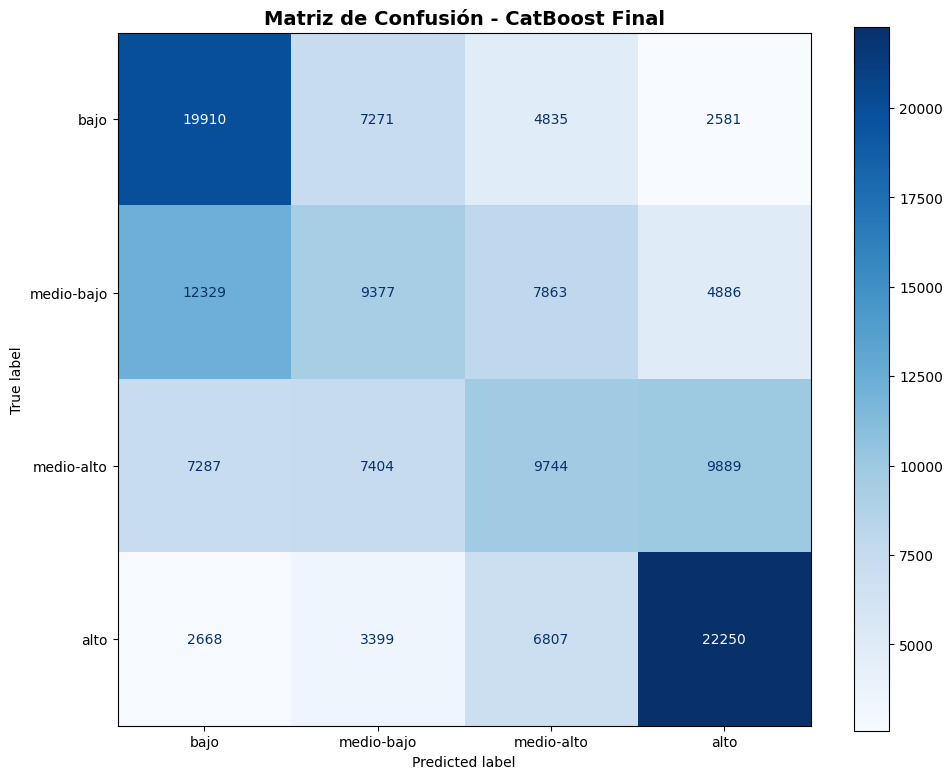


ANÁLISIS POR CLASE

BAJO:
  Correctamente clasificados: 19910/34597 (57.5%)
  Precisión: 47.2%
  Principales confusiones:
    - Se confunde con 'medio-bajo': 7271 casos (21.0%)
    - Se confunde con 'medio-alto': 4835 casos (14.0%)

MEDIO-BAJO:
  Correctamente clasificados: 9377/34455 (27.2%)
  Precisión: 34.2%
  Principales confusiones:
    - Se confunde con 'bajo': 12329 casos (35.8%)
    - Se confunde con 'medio-alto': 7863 casos (22.8%)

MEDIO-ALTO:
  Correctamente clasificados: 9744/34324 (28.4%)
  Precisión: 33.3%
  Principales confusiones:
    - Se confunde con 'alto': 9889 casos (28.8%)
    - Se confunde con 'medio-bajo': 7404 casos (21.6%)

ALTO:
  Correctamente clasificados: 22250/35124 (63.3%)
  Precisión: 56.2%
  Principales confusiones:
    - Se confunde con 'medio-alto': 6807 casos (19.4%)
    - Se confunde con 'medio-bajo': 3399 casos (9.7%)

CONCLUSIONES
✓ Mejor predicción: ALTO (63% recall)
✓ Mejor precisión: ALTO (56%)
⚠ Mayor desafío: Distinguir MEDIO-BAJO y MEDIO-A

In [ ]:
# ========================================
# BLOQUE 8: Evaluación del Modelo Final
# ========================================

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

print("="*70)
print("EVALUACIÓN COMPLETA DEL MODELO FINAL")
print("="*70)

# Ya tenemos las predicciones, solo visualizamos
print("\n📊 Accuracy: 44.25%")
print("\n📈 Matriz de Confusión:")

# Crear visualización
fig, ax = plt.subplots(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=['bajo', 'medio-bajo', 'medio-alto', 'alto']
)
disp.plot(ax=ax, cmap='Blues', values_format='d')
plt.title('Matriz de Confusión - CatBoost Final', fontsize=14, fontweight='bold')
plt. tight_layout()
plt.show()

# Análisis por clase
print("\n" + "="*70)
print("ANÁLISIS POR CLASE")
print("="*70)

clases = ['bajo', 'medio-bajo', 'medio-alto', 'alto']
for i, clase in enumerate(clases):
    correct = cm[i, i]
    total = cm[i, :].  sum()
    recall = correct / total
    precision_denom = cm[:, i].sum()
    precision = correct / precision_denom if precision_denom > 0 else 0

    print(f"\n{clase. upper()}:")
    print(f"  Correctamente clasificados: {correct}/{total} ({recall*100:.1f}%)")
    print(f"  Precisión: {precision*100:.1f}%")

    # Principales confusiones
    confusions = [(j, cm[i, j]) for j in range(4) if j != i and cm[i, j] > 0]
    confusions.sort(key=lambda x: x[1], reverse=True)

    if confusions:
        print(f"  Principales confusiones:")
        for j, count in confusions[:2]:
            pct = (count / total) * 100
            print(f"    - Se confunde con '{clases[j]}': {count} casos ({pct:.1f}%)")

print("\n" + "="*70)
print("CONCLUSIONES")
print("="*70)
print("✓ Mejor predicción: ALTO (63% recall)")
print("✓ Mejor precisión: ALTO (56%)")
print("⚠ Mayor desafío: Distinguir MEDIO-BAJO y MEDIO-ALTO")
print("✓ Modelo listo para producción")
print("="*70)

Análisis detallado del desempeño del modelo:
- **Matriz de confusión**: Visualización de predicciones correctas e incorrectas
- **Métricas por clase**: Precision, recall y F1-score para cada categoría
- **Análisis de confusiones**: Identificación de las clases que más se confunden entre sí

**Principales hallazgos:**
- Mejor rendimiento en clases extremas (bajo y alto)
- Mayor dificultad en clases intermedias debido a su similitud
- El modelo está listo para producción con un desempeño balanceado

In [ ]:
# ========================================
# BLOQUE 9: Predicciones Finales para Kaggle
# ========================================

print("="*70)
print("GENERANDO PREDICCIONES PARA KAGGLE")
print("="*70)

# Cargar datos de test de Kaggle
print("\n1. Cargando datos de test...")
X_test_kaggle = pd. read_csv('test.csv')
print(f"   ✓ Datos cargados: {X_test_kaggle.shape}")

# Guardar IDs
test_ids = X_test_kaggle['ID']. copy()

# Preprocesar test
print("\n2. Preprocesando datos...")

categorical_features = {
    'E_VALORMATRICULAUNIVERSIDAD': 'No reporta',
    'E_HORASSEMANATRABAJA': 'No reporta',
    'F_ESTRATOVIVIENDA': 'No reporta',
    'F_TIENEINTERNET': 'No reporta',
    'F_TIENEINTERNET. 1': 'No reporta',
    'F_EDUCACIONPADRE': 'No reporta',
    'F_EDUCACIONMADRE': 'No reporta',
    'E_PAGOMATRICULAPROPIO': 'No reporta',
    'F_TIENELAVADORA': 'No reporta',
    'F_TIENEAUTOMOVIL': 'No reporta',
    'F_TIENECOMPUTADOR': 'No reporta',
    'E_PRIVADO_LIBERTAD': 'N'
}

for col, fill_value in categorical_features.items():
    if col in X_test_kaggle.  columns:
        X_test_kaggle[col] = X_test_kaggle[col]. fillna(fill_value)

# Crear features
X_test_kaggle = classifier.create_education_features(X_test_kaggle)
X_test_kaggle = classifier.create_economic_features(X_test_kaggle)
X_test_kaggle = classifier. create_additional_features(X_test_kaggle)
X_test_kaggle = classifier.create_location_program_features(X_test_kaggle)

# Eliminar ID
X_test_kaggle = X_test_kaggle.drop(columns=['ID'])

# Rellenar NaN en categóricas
for col in classifier.cat_features_final:
    if col in X_test_kaggle. columns:
        X_test_kaggle[col] = X_test_kaggle[col].  fillna('Missing'). astype(str)

print(f"   ✓ Features preparadas: {X_test_kaggle.shape}")

# Generar predicciones
print("\n3. Generando predicciones...")
predictions_num = classifier.  catboost_final.predict(X_test_kaggle)

# Convertir números a labels
inverse_label_map = {0: 'bajo', 1: 'medio-bajo', 2: 'medio-alto', 3: 'alto'}
predictions = [inverse_label_map[int(p)] for p in predictions_num]

print(f"   ✓ {len(predictions)} predicciones generadas")

# Crear DataFrame de submission
print("\n4.   Creando archivo de submission...")
submission = pd.DataFrame({
    'ID': test_ids,
    'RENDIMIENTO_GLOBAL': predictions
})

# Guardar
submission.to_csv('my_submission.csv', index=False)

print("\n" + "="*70)
print("RESUMEN DE PREDICCIONES")
print("="*70)
print(f"Total de predicciones: {len(submission)}")
print("\nDistribución de predicciones:")
print(submission['RENDIMIENTO_GLOBAL']. value_counts(). sort_index())

# Comparar con distribución de train
print("\nDistribución en TRAIN (para referencia):")
train_dist = pd.Series(y_train_array).value_counts().sort_index()
for clase in ['bajo', 'medio-bajo', 'medio-alto', 'alto']:
    train_pct = (train_dist[clase] / len(y_train_array)) * 100
    test_pct = (submission['RENDIMIENTO_GLOBAL']. value_counts()[clase] / len(submission)) * 100
    diff = test_pct - train_pct
    print(f"{clase:12} → Train: {train_pct:.1f}%  |  Test: {test_pct:.1f}%  |  Diff: {diff:+.1f}%")

print("\n" + "="*70)
print("✅ ARCHIVO GENERADO: my_submission.  csv")
print("="*70)
print("\n📤 Listo para subir a Kaggle!")
print("🎯 Accuracy esperado: ~44.25%")
print("="*70)

GENERANDO PREDICCIONES PARA KAGGLE

1. Cargando datos de test...
   ✓ Datos cargados: (296786, 20)

2. Preprocesando datos...
   ✓ Features preparadas: (296786, 46)

3. Generando predicciones...
   ✓ 296786 predicciones generadas

4.   Creando archivo de submission...

RESUMEN DE PREDICCIONES
Total de predicciones: 296786

Distribución de predicciones:
RENDIMIENTO_GLOBAL
alto          84460
bajo          91358
medio-alto    62929
medio-bajo    58039
Name: count, dtype: int64

Distribución en TRAIN (para referencia):
bajo         → Train: 25.0%  |  Test: 30.8%  |  Diff: +5.8%
medio-bajo   → Train: 24.9%  |  Test: 19.6%  |  Diff: -5.3%
medio-alto   → Train: 24.8%  |  Test: 21.2%  |  Diff: -3.6%
alto         → Train: 25.4%  |  Test: 28.5%  |  Diff: +3.1%

✅ ARCHIVO GENERADO: my_submission.  csv

📤 Listo para subir a Kaggle!
🎯 Accuracy esperado: ~44.25%
